
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [1]:
# Set your student number and name
student_number = '401106182'
Name = 'Amirhossein'
Last_Name = 'Souri'

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [2]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = (range_end - range_start) * np.random.rand(num_samples, 1) + range_start
    y = 0.1 * X ** 6 - 2 * X ** 3 + 7 * X ** 2 - 9 * X + 3 + noise_std * np.random.randn(num_samples, 1)
    y = y.reshape((num_samples, ))
    return X, y

X, y = generate_dataset(-3, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test2, y_test2 = generate_dataset(4, 6, X_test.shape[0])

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [4]:
class PolynomailRegression():

    def __init__(self, degree, learning_rate = 0.05, iterations =500) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iter = iterations
        self.w = np.ones((self.degree + 1, 1))
        
    def _generate_X_poly(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        for d in range(2, self.degree + 1):
            X = np.concatenate((X, (X[:, 1] ** d).reshape(-1, 1)), axis=1)
            
        return X
    
    def _normalize(self, X):
        for i in range(1, X.shape[1]):
            X[:, i] = (X[:, i] - np.min(X[:, i])) / (np.max(X[:, i]) - np.min(X[:, i]))
        return X
        
    
    def fit(self, X, y):
        X_poly = self._generate_X_poly(X)
        X_norm = self._normalize(X_poly)
        for _ in range(self.n_iter):
            grad = np.dot(X_norm.T, np.dot(X_norm, self.w) - y.reshape(-1, 1))
            self.w -= self.learning_rate * grad
            
        return self

    def predict(self, X):
        X_poly = self._generate_X_poly(X)
        X_norm = self._normalize(X_poly)
        return np.dot(X_norm, self.w).flatten()

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [5]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

for d in range(2, 13):
    poly_reg = PolynomailRegression(d, learning_rate=5e-4, iterations=1000)
    poly_reg.fit(X_train, y_train)
    print('Degree: %d' % d)
    print('training MSE: %f' % evaluate_model(poly_reg, X_train, y_train))
    print('test1 MSE: %f' % evaluate_model(poly_reg, X_test, y_test))
    print('test2 MSE: %f' % evaluate_model(poly_reg, X_test2, y_test2))
    print('_____________________________')

Degree: 2
training MSE: 92.217747
test1 MSE: 85.088455
test2 MSE: 3721179.312476
_____________________________
Degree: 3
training MSE: 39.914395
test1 MSE: 32.566983
test2 MSE: 3713718.574372
_____________________________
Degree: 4
training MSE: 27.130909
test1 MSE: 24.288588
test2 MSE: 3685431.980624
_____________________________
Degree: 5
training MSE: 26.130416
test1 MSE: 24.434314
test2 MSE: 3682558.663511
_____________________________
Degree: 6
training MSE: 25.070384
test1 MSE: 24.536238
test2 MSE: 3691655.236657
_____________________________
Degree: 7
training MSE: 25.090589
test1 MSE: 24.560348
test2 MSE: 3691825.337927
_____________________________
Degree: 8
training MSE: 24.861213
test1 MSE: 24.971604
test2 MSE: 3701099.710979
_____________________________
Degree: 9
training MSE: 24.898055
test1 MSE: 24.800924
test2 MSE: 3705899.781208
_____________________________
Degree: 10
training MSE: 24.873566
test1 MSE: 25.114245
test2 MSE: 3713243.168822
_____________________________


## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

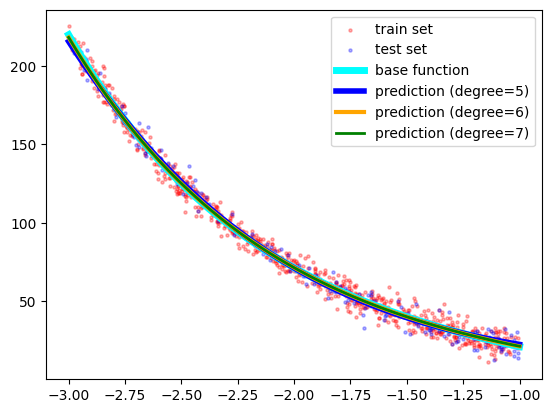

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(-3, -1, num=100)
y_true = 0.1 * x ** 6 - 2 * x ** 3 + 7 * x ** 2 - 9 * x + 3

X = x.reshape(-1, 1)
poly_reg5 = PolynomailRegression(5, 5e-4, 1000)
poly_reg5.fit(X_train, y_train)
y_pred5 = poly_reg5.predict(X)
poly_reg6 = PolynomailRegression(6, 5e-4, 1000)
poly_reg6.fit(X_train, y_train)
y_pred6 = poly_reg6.predict(X)
poly_reg7 = PolynomailRegression(7, 5e-4, 1000)
poly_reg7.fit(X_train, y_train)
y_pred7 = poly_reg7.predict(X)

plt.scatter(X_train, y_train, s=5, alpha=0.3, c='r')
plt.scatter(X_test, y_test, s=5, alpha=0.3, c='b')
plt.plot(x, y_true, c='cyan', lw=5)
plt.plot(x, y_pred5, c='blue', lw=4)
plt.plot(x, y_pred6, c='orange', lw=3)
plt.plot(x, y_pred7, c='green', lw=2)
plt.legend(['train set', 'test set', 'base function', 'prediction (degree=5)',
            'prediction (degree=6)', 'prediction (degree=7)'])
plt.show()

## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

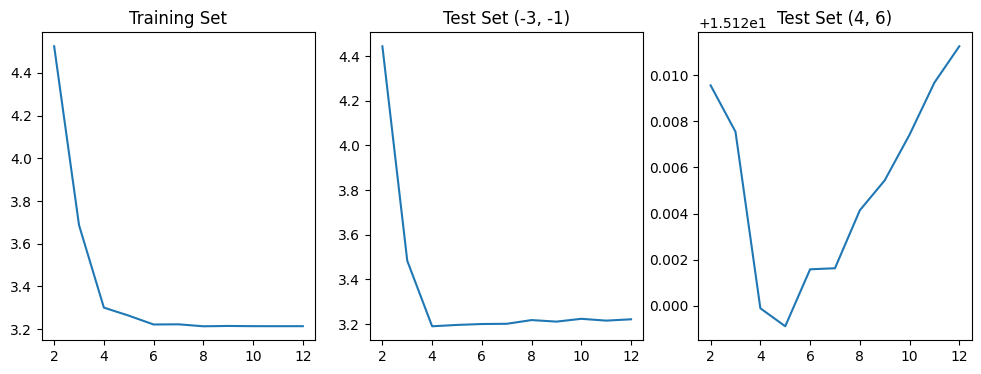

In [7]:
train_errors = []
test1_errors = []
test2_errors = []
degrees = list(range(2, 13))

for d in degrees:
    poly_reg = PolynomailRegression(d, 5e-4, 1000)
    poly_reg.fit(X_train, y_train)
    train_errors.append(np.log(evaluate_model(poly_reg, X_train, y_train)))
    test1_errors.append(np.log(evaluate_model(poly_reg, X_test, y_test)))
    test2_errors.append(np.log(evaluate_model(poly_reg, X_test2, y_test2)))

plt.subplots(1, 3, figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Training Set')
plt.plot(degrees, train_errors)
plt.subplot(1, 3, 2)
plt.title('Test Set (-3, -1)')
plt.plot(degrees, test1_errors)
plt.subplot(1, 3, 3)
plt.title('Test Set (4, 6)')
plt.plot(degrees, test2_errors)
plt.show()

## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:** Assuming that the data is bounded in range (-3, -1) is a bias that helps with training the model and decreases the error of train set and even the test set that satisfies the assuming bias. on the other hand, when data appears in range (4, 6) which doesn't satisfy the bias, test set error becomes very large ...